In [15]:
# Import numpy for numerical operations such as array manipulation
import numpy as np

# Import pandas for data manipulation and analysis, although not heavily used in this example
import pandas as pd

# Import matplotlib for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization, built on top of matplotlib
import seaborn as sns

# Import tensorflow for building and training the neural network models
import tensorflow as tf

# Importing the IMDb movie reviews dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import imdb

# Importing functions to preprocess text data, especially for padding sequences to the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importing Sequential model type from tensorflow.keras, which allows us to build a model layer by layer
from tensorflow.keras.models import Sequential

# Importing layers to build the neural network; we use Embedding for word embeddings, LSTM for sequence learning, Dense for fully connected layers, and Dropout for regularization
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Importing classification report and confusion matrix for evaluating the model's performance after training
from sklearn.metrics import classification_report, confusion_matrix

# Importing Tokenizer to preprocess and convert text into sequences of integers
from tensorflow.keras.preprocessing.text import Tokenizer


In [18]:
# Setting the maximum number of words to consider in the dataset
# We will only keep the top 10,000 most frequent words in the dataset
max_features = 10000

# Setting the maximum number of words to keep in each review
# Reviews longer than this will be truncated, and shorter ones will be padded with zeros
maxlen = 100

# Loading the IMDb dataset
# num_words=max_features limits the dataset to the top max_features most frequent words
# The dataset is split into training and testing sets, each containing reviews and corresponding labels (0 for negative, 1 for positive)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Padding the sequences to ensure each review is exactly maxlen words long
# This is necessary because neural networks expect input data to have a uniform shape
# pad_sequences will pad shorter reviews with zeros at the beginning
# It will also truncate longer reviews to the first maxlen words
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


In [19]:
# Initializing a Sequential model, which is a linear stack of layers
model = Sequential([
    # Adding an Embedding layer to convert word indices into dense vectors of fixed size
    # max_features is the size of the vocabulary (input dimension)
    # 128 is the output dimension (size of the dense vectors)
    # input_length is the length of input sequences
    Embedding(max_features, 128, input_length=maxlen),

    # Adding an LSTM layer with 128 units
    # LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) good for sequence prediction
    # dropout and recurrent_dropout are the dropout rates for input and recurrent connections, respectively, to prevent overfitting
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),

    # Adding a Dense layer with a single unit
    # The sigmoid activation function is used to output a probability value between 0 and 1
    Dense(1, activation='sigmoid')
])

# Compiling the model with Adam optimizer
# binary_crossentropy is used as the loss function because it's a binary classification problem
# metrics include accuracy to monitor the training and testing steps
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# Training the model with training data
# epochs is the number of times the model will go through the entire training dataset
# batch_size is the number of samples per gradient update
# validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
782/782 [==============================] - 323s 407ms/step - loss: 0.4326 - accuracy: 0.7966 - val_loss: 0.3623 - val_accuracy: 0.8444
Epoch 2/5
782/782 [==============================] - 314s 402ms/step - loss: 0.2775 - accuracy: 0.8881 - val_loss: 0.3601 - val_accuracy: 0.8487
Epoch 3/5
782/782 [==============================] - 314s 401ms/step - loss: 0.2078 - accuracy: 0.9192 - val_loss: 0.3709 - val_accuracy: 0.8449
Epoch 4/5
782/782 [==============================] - 312s 399ms/step - loss: 0.1526 - accuracy: 0.9434 - val_loss: 0.4156 - val_accuracy: 0.8290
Epoch 5/5
782/782 [==============================] - 316s 404ms/step - loss: 0.1165 - accuracy: 0.9581 - val_loss: 0.4774 - val_accuracy: 0.8389


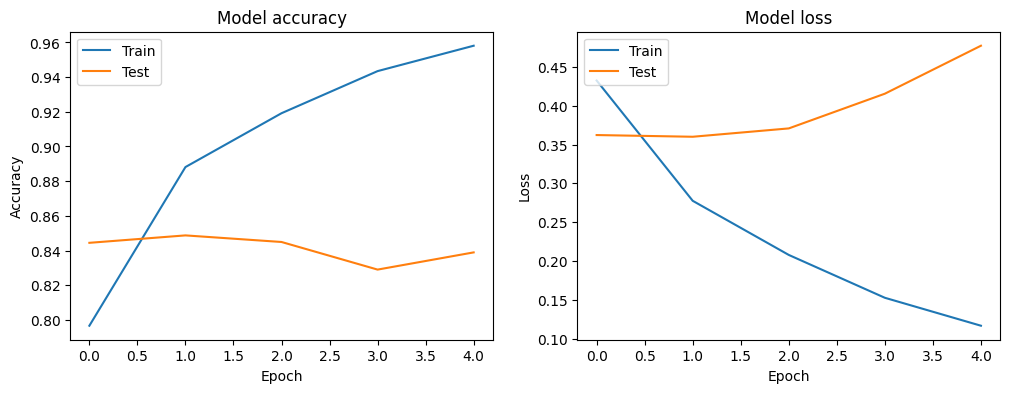

782/782 [==============================] - 40s 51ms/step - loss: 0.4774 - accuracy: 0.8389
Accuracy: 83.89%


In [21]:
# Plotting the training and validation accuracy values over epochs
plt.figure(figsize=(12, 4))  # Setting the figure size for the plots
plt.subplot(1, 2, 1)  # Creating a subplot (1 row, 2 columns, 1st plot)
plt.plot(history.history['accuracy'])  # Plotting training accuracy
plt.plot(history.history['val_accuracy'])  # Plotting validation accuracy
plt.title('Model accuracy')  # Setting the title of the plot
plt.ylabel('Accuracy')  # Setting the label for the y-axis
plt.xlabel('Epoch')  # Setting the label for the x-axis
plt.legend(['Train', 'Test'], loc='upper left')  # Adding a legend to the plot

# Plotting the training and validation loss values over epochs
plt.subplot(1, 2, 2)  # Creating a subplot (1 row, 2 columns, 2nd plot)
plt.plot(history.history['loss'])  # Plotting training loss
plt.plot(history.history['val_loss'])  # Plotting validation loss
plt.title('Model loss')  # Setting the title of the plot
plt.ylabel('Loss')  # Setting the label for the y-axis
plt.xlabel('Epoch')  # Setting the label for the x-axis
plt.legend(['Train', 'Test'], loc='upper left')  # Adding a legend to the plot
plt.show()  # Displaying the plots

# Evaluating the model on the test data to get the loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test)
# Printing the accuracy of the model on the test data
print(f'Accuracy: {accuracy * 100:.2f}%')


In [25]:
# Get the word index dictionary mapping words to their integer indices
word_index = imdb.get_word_index()

# Define a function to preprocess a single sentence
def preprocess_sentence(sentence, word_index, maxlen):
    # Tokenize the sentence
    tokenizer = Tokenizer(num_words=max_features)

    # Split the sentence into words
    words = sentence.lower().split()

    # Convert words to their integer indices using the word index
    sequence = [word_index.get(word, 0) for word in words]

    # Pad the sequence to ensure it has the same length as the training data
    padded_sequence = pad_sequences([sequence], maxlen=maxlen)

    return padded_sequence

# Define the sentence you want to test
test_sentence = "This movie was below average"

# Preprocess the test sentence
test_padded = preprocess_sentence(test_sentence, word_index, maxlen)

# Predict the sentiment of the test sentence
# The model outputs a probability, which we convert to binary (0 for negative, 1 for positive)
prediction = model.predict(test_padded)
sentiment = 'positive' if prediction > 0.5 else 'negative'

# Print the result
print(f'The sentiment of the test sentence is: {sentiment}')


1/1 [==============================] - 0s 39ms/step
The sentiment of the test sentence is: negative
